In [2]:
import os
import cv2 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
players=["lingard","messi","ronaldo","son","swarez"]
DIR="../Data/players"

Performing face detection and recognition on footballers,dataset is self prepared data set using images from the google search with 5 different football players and having 28 diffrent pictures.

In [4]:
haar_cascade = cv2.CascadeClassifier('haarCascade_facedetection.xml')

../Data/players/lingard
../Data/players/messi
../Data/players/ronaldo
../Data/players/son
../Data/players/swarez


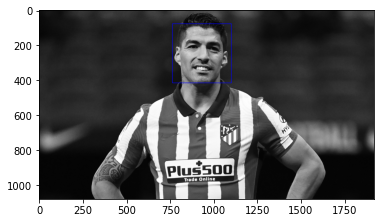

In [5]:
feature =[]
labels =[]


#reading the images from location
for i in players:
    path=os.path.join(DIR,i)
    label=players.index(i)
    print(path)
    
    for image in os.listdir(path):
        image_path= os.path.join(path,image)

        image_array=cv2.imread(image_path)
        if image_array is None:
            continue

        #gray scalling
        gray = cv2.cvtColor(image_array, cv2.COLOR_BGR2GRAY)
    


        face_detect = haar_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=12)
        
        for (x,y,w,h) in face_detect:
            face_rec=gray[y:y+h,x:x+w]
            feature.append(face_rec)
            labels.append(label)
        
        for (x,y,w,h) in face_detect:
            image=cv2.cvtColor(gray,cv2.COLOR_GRAY2BGR)
            detected_face=cv2.rectangle(image, (x,y), (x+w,y+h), (0,0,255), thickness=2)
    
        plt.imshow(detected_face)    

In [7]:
feature = np.array(feature, dtype='object')
labels = np.array(labels)

In [8]:
face_reco = cv2.face.LBPHFaceRecognizer_create()

In [9]:
face_reco.train(feature,labels)

testing the model

In [14]:
img=cv2.imread("../Data/test/test2.jpg")

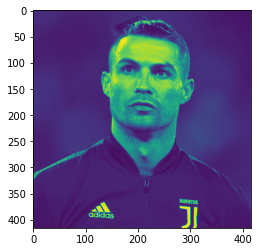

In [15]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)    

Label=ronaldowith confidence of 52.0976944363716


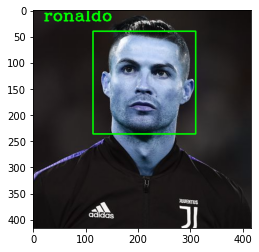

In [16]:
face_detect = haar_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=12)
for (x,y,w,h) in face_detect:        
    face_rec=gray[y:y+h,x:x+w]
    label,confidence= face_reco.predict(face_rec)
    print(f'Label={players[label]}with confidence of {confidence}')
    
    cv2.putText(img, str(players[label]), (20,20), cv2.FONT_HERSHEY_COMPLEX, 1.0, (0,255,0), thickness=2)
    cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), thickness=2)

plt.imshow(img)        